In [1]:
import pandas as pd

In [2]:
# lOad CSV file
df=pd.read_csv('C:/Users/Ravi/Desktop/Upgrad assignment_ Bank model/bank-additional/bank-additional/bank-additional-full.csv',sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
# Check if there are any NaN values present
df[df.isna().any(axis=1)]


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


# Result from above analysis

job:  330 unknown values present

martial: 80 unknowns
    
education: 1731 unknowns
    
default: 8597 unknowns
    
housing: 990 unknowns
    
loan: 990 unknowns
    



 Input variables:
 
 
   # bank client data:
   1 - age (numeric)
    
   2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
    
   3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
    
   4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
     
     
   5 - default: has credit in default? (categorical: "no","yes","unknown")
    
   6 - housing: has housing loan? (categorical: "no","yes","unknown")
   
   7 - loan: has personal loan? (categorical: "no","yes","unknown")
   
   
   # related with the last contact of the current campaign:
   8 - contact: contact communication type (categorical: "cellular","telephone") 
    
   9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
    
  10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
   
  11 - duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
  
   
   # other attributes:
  12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
   
  13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
  
  14 - previous: number of contacts performed before this campaign and for this client (numeric)
   
  15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
   
   # social and economic context attributes
  16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
   
  17 - cons.price.idx: consumer price index - monthly indicator (numeric)    
  
  18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)  
  
  19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
  
  20 - nr.employed: number of employees - quarterly indicator (numeric)
  

  Output variable (desired target):
  21 - y - has the client subscribed a term deposit? (binary: "yes","no")


In [4]:
# check all data column-wise for any discrepencies

for i in df.columns:
    print('[COLUMN]: ',i)
    print(df[i].value_counts())
    print('........\n\n\n')

[COLUMN]:  age
31    1947
32    1846
33    1833
36    1780
35    1759
34    1745
30    1714
37    1475
29    1453
39    1432
38    1407
41    1278
40    1161
42    1142
45    1103
43    1055
46    1030
44    1011
28    1001
48     979
47     928
50     875
27     851
49     839
52     779
51     754
53     733
56     704
26     698
54     684
      ... 
65      44
19      42
76      34
69      34
72      34
73      34
68      33
74      32
80      31
18      28
78      27
67      26
75      24
88      22
77      20
81      20
82      17
83      17
85      15
79      14
86       8
84       7
17       5
92       4
98       2
89       2
91       2
87       1
94       1
95       1
Name: age, Length: 78, dtype: int64
........



[COLUMN]:  job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            87

In [5]:
# Let's try using 'unknown' as a class name

# Problem:   'default class bias' : 35.5k yes vs 3 no  [TRY excluding and check if accuracy increases?]



# Convert all categorical classes into numerical ones
for i in df.columns:
    print(df[i].dtype.name)
    if df[i].dtype.name in ['category','object']:
        print('Converting [{0}] into categories: '.format(i))
        df[i]=df[i].astype('category')
        df[i]=df[i].cat.codes
        print('........\n\n\n')
    
df.head()

int64
object
Converting [job] into categories: 
........



object
Converting [marital] into categories: 
........



object
Converting [education] into categories: 
........



object
Converting [default] into categories: 
........



object
Converting [housing] into categories: 
........



object
Converting [loan] into categories: 
........



object
Converting [contact] into categories: 
........



object
Converting [month] into categories: 
........



object
Converting [day_of_week] into categories: 
........



int64
int64
int64
int64
object
Converting [poutcome] into categories: 
........



float64
float64
float64
float64
float64
object
Converting [y] into categories: 
........





,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [6]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,5,1,5,0,2,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,1,5,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,6,0,2,0,0,7,0,...,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,9,1,5,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41187,74,5,1,5,0,2,0,0,7,0,...,3,999,1,0,-1.1,94.767,-50.8,1.028,4963.6,0


In [7]:
# Normalize data:
for i in df.columns:
    print(df[i].dtype.name)
    
    if df[i].dtype.name in ['int64','float64','int8'] and i!='y':
        # Normalize Data
        print('Normalizing [{0}] : '.format(i))
        df[i]=(df[i]-df[i].mean())/df[i].std()


df.head()

int64
Normalizing [age] : 
int8
Normalizing [job] : 
int8
Normalizing [marital] : 
int8
Normalizing [education] : 
int8
Normalizing [default] : 
int8
Normalizing [housing] : 
int8
Normalizing [loan] : 
int8
Normalizing [contact] : 
int8
Normalizing [month] : 
int8
Normalizing [day_of_week] : 
int64
Normalizing [duration] : 
int64
Normalizing [campaign] : 
int64
Normalizing [pdays] : 
int64
Normalizing [previous] : 
int8
Normalizing [poutcome] : 
float64
Normalizing [emp.var.rate] : 
float64
Normalizing [cons.price.idx] : 
float64
Normalizing [cons.conf.idx] : 
float64
Normalizing [euribor3m] : 
float64
Normalizing [nr.employed] : 
int8


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1.533016,-0.201577,-0.283738,-1.753903,-0.513593,-1.087694,-0.452485,1.318254,0.762549,-0.718826,...,-0.565915,0.195412,-0.34949,0.19262,0.648084,0.722714,0.886436,0.712451,0.331676,0
1,1.628973,0.911216,-0.283738,-0.349726,1.945303,-1.087694,-0.452485,1.318254,0.762549,-0.718826,...,-0.565915,0.195412,-0.34949,0.19262,0.648084,0.722714,0.886436,0.712451,0.331676,0
2,-0.290182,0.911216,-0.283738,-0.349726,-0.513593,0.942116,-0.452485,1.318254,0.762549,-0.718826,...,-0.565915,0.195412,-0.34949,0.19262,0.648084,0.722714,0.886436,0.712451,0.331676,0
3,-0.002309,-1.036171,-0.283738,-1.285844,-0.513593,-1.087694,-0.452485,1.318254,0.762549,-0.718826,...,-0.565915,0.195412,-0.34949,0.19262,0.648084,0.722714,0.886436,0.712451,0.331676,0
4,1.533016,0.911216,-0.283738,-0.349726,-0.513593,-1.087694,2.311412,1.318254,0.762549,-0.718826,...,-0.565915,0.195412,-0.34949,0.19262,0.648084,0.722714,0.886436,0.712451,0.331676,0


In [8]:
# Convert data into numpy 'input and labels array'
input_data=[i[:10]+i[11:-1] for i in df.values.tolist()] #Exclude 'duration' attribute
labels=[int(i[-1]) for i in df.values.tolist()]
input_data[0]

[1.5330156769374728,
 -0.20157679957948554,
 -0.2837380535957619,
 -1.7539032961121581,
 -0.5135934560777252,
 -1.0876937789327175,
 -0.45248512347328795,
 1.318253954757047,
 0.7625486084395953,
 -0.7188257249913392,
 -0.5659151041652783,
 0.1954115278938769,
 -0.349490041500585,
 0.1926197334429996,
 0.6480843990520574,
 0.7227136968894903,
 0.886435800587221,
 0.7124512301068973,
 0.33167588051818486]

In [9]:
from collections import Counter
Counter(labels),input_data[0]

(Counter({0: 36548, 1: 4640}),
 [1.5330156769374728,
  -0.20157679957948554,
  -0.2837380535957619,
  -1.7539032961121581,
  -0.5135934560777252,
  -1.0876937789327175,
  -0.45248512347328795,
  1.318253954757047,
  0.7625486084395953,
  -0.7188257249913392,
  -0.5659151041652783,
  0.1954115278938769,
  -0.349490041500585,
  0.1926197334429996,
  0.6480843990520574,
  0.7227136968894903,
  0.886435800587221,
  0.7124512301068973,
  0.33167588051818486])

In [10]:
from keras.activations import relu
from keras.callbacks import EarlyStopping,TensorBoard, ModelCheckpoint
from keras.layers import *
from keras.optimizers import adam
from keras.losses import mse
from keras.models import Sequential,Model
from keras.utils import to_categorical
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle

def test_train_dev_split(input_data, output_data, train=0.8, dev=0.1,
                         test=0.1):
    #make seed for exact results everything
    #input_data=preprocess_input(input_data)
    input_data, output_data = shuffle(input_data, output_data, random_state=0)
    split1 = int(train * len(input_data))
    split2 = int((train + dev) * len(input_data))
    train_input = input_data[:split1]
    dev_input = input_data[split1:split2]
    test_input = input_data[split2:]
    

    train_output = output_data[:split1]
    dev_output = output_data[split1:split2]
    test_output = output_data[split2:]

    return np.array(train_input),np.array(train_output),np.array(dev_input), np.array(dev_output),np.array(test_input), np.array(test_output)

Using TensorFlow backend.


(32950, 19)
(None, 19) (None, 1)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                640       
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_4 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 17        
Total params: 1,185
Trainable params: 1,185
Non-trainable params: 0
_________________________________________________________________
None
Instructions for updating:
Use tf.cast instead.
Train on 32950 samples, validate on 4119 samples
Epoch

32950/32950 [==============================] - 1s 44us/step - loss: 0.3185 - acc: 0.8928 - val_loss: 0.2814 - val_acc: 0.8988

Epoch 00033: val_acc did not improve from 0.89876
Epoch 34/500
32950/32950 [==============================] - 1s 45us/step - loss: 0.3178 - acc: 0.8937 - val_loss: 0.2812 - val_acc: 0.8990

Epoch 00034: val_acc improved from 0.89876 to 0.89900, saving model to find_phone_model1.h5
Epoch 35/500
32950/32950 [==============================] - 1s 43us/step - loss: 0.3164 - acc: 0.8940 - val_loss: 0.2811 - val_acc: 0.8990

Epoch 00035: val_acc did not improve from 0.89900
Epoch 36/500
32950/32950 [==============================] - 1s 44us/step - loss: 0.3148 - acc: 0.8947 - val_loss: 0.2810 - val_acc: 0.8990

Epoch 00036: val_acc did not improve from 0.89900
Epoch 37/500
32950/32950 [==============================] - 1s 38us/step - loss: 0.3144 - acc: 0.8941 - val_loss: 0.2809 - val_acc: 0.8988

Epoch 00037: val_acc did not improve from 0.89900
Epoch 38/500
32950/32

32950/32950 [==============================] - 1s 37us/step - loss: 0.3035 - acc: 0.8954 - val_loss: 0.2798 - val_acc: 0.8997

Epoch 00075: val_acc did not improve from 0.89998
Epoch 76/500
32950/32950 [==============================] - 1s 38us/step - loss: 0.3041 - acc: 0.8954 - val_loss: 0.2798 - val_acc: 0.8995

Epoch 00076: val_acc did not improve from 0.89998
Epoch 77/500
32950/32950 [==============================] - 1s 38us/step - loss: 0.3022 - acc: 0.8958 - val_loss: 0.2798 - val_acc: 0.8992

Epoch 00077: val_acc did not improve from 0.89998
Epoch 78/500
32950/32950 [==============================] - 1s 38us/step - loss: 0.3033 - acc: 0.8957 - val_loss: 0.2798 - val_acc: 0.8992

Epoch 00078: val_acc did not improve from 0.89998
Epoch 79/500
32950/32950 [==============================] - 1s 38us/step - loss: 0.3016 - acc: 0.8959 - val_loss: 0.2798 - val_acc: 0.8990

Epoch 00079: val_acc did not improve from 0.89998
Epoch 80/500
32950/32950 [==============================] - 1s 

32950/32950 [==============================] - 1s 34us/step - loss: 0.2967 - acc: 0.8963 - val_loss: 0.2796 - val_acc: 0.8966

Epoch 00118: val_acc did not improve from 0.89998
Epoch 119/500
32950/32950 [==============================] - 1s 36us/step - loss: 0.2954 - acc: 0.8961 - val_loss: 0.2795 - val_acc: 0.8963

Epoch 00119: val_acc did not improve from 0.89998
Epoch 120/500
32950/32950 [==============================] - 1s 41us/step - loss: 0.2941 - acc: 0.8963 - val_loss: 0.2795 - val_acc: 0.8963

Epoch 00120: val_acc did not improve from 0.89998
Epoch 121/500
32950/32950 [==============================] - 1s 38us/step - loss: 0.2965 - acc: 0.8964 - val_loss: 0.2795 - val_acc: 0.8973

Epoch 00121: val_acc did not improve from 0.89998
Epoch 122/500
32950/32950 [==============================] - 1s 38us/step - loss: 0.2970 - acc: 0.8966 - val_loss: 0.2796 - val_acc: 0.8966

Epoch 00122: val_acc did not improve from 0.89998
Epoch 123/500
32950/32950 [==============================] 

32950/32950 [==============================] - 1s 37us/step - loss: 0.2927 - acc: 0.8952 - val_loss: 0.2795 - val_acc: 0.8963

Epoch 00161: val_acc did not improve from 0.89998
Epoch 162/500
32950/32950 [==============================] - 1s 38us/step - loss: 0.2928 - acc: 0.8959 - val_loss: 0.2795 - val_acc: 0.8963

Epoch 00162: val_acc did not improve from 0.89998
Epoch 163/500
32950/32950 [==============================] - 1s 37us/step - loss: 0.2924 - acc: 0.8970 - val_loss: 0.2795 - val_acc: 0.8966

Epoch 00163: val_acc did not improve from 0.89998
Epoch 164/500
32950/32950 [==============================] - 1s 37us/step - loss: 0.2927 - acc: 0.8971 - val_loss: 0.2794 - val_acc: 0.8966

Epoch 00164: val_acc did not improve from 0.89998
Epoch 165/500
32950/32950 [==============================] - 1s 37us/step - loss: 0.2936 - acc: 0.8961 - val_loss: 0.2795 - val_acc: 0.8963

Epoch 00165: val_acc did not improve from 0.89998
Epoch 166/500
32950/32950 [==============================] 

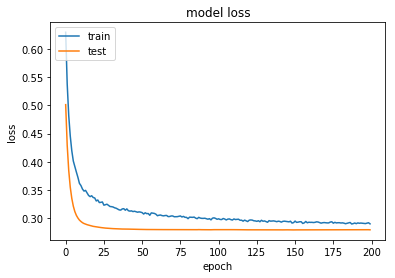

CONFUSION MATRIX:
y_pred:  [0 0 0 ... 0 0 0]
Y_true: [0 0 0 ... 1 0 0]


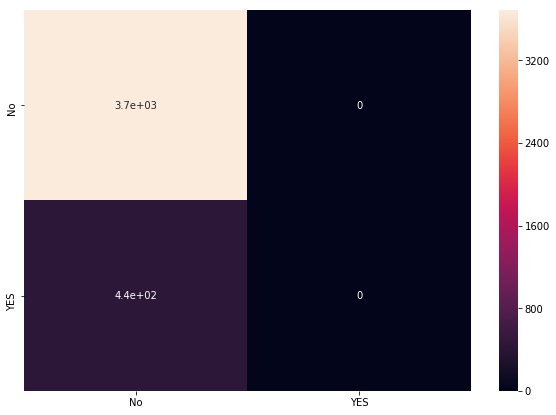

In [12]:
# Model experiment-1:
'''
* pdays=999 [normalized to 0-1]
* Inculde 'default' attribute
'''
def response_predictor_model(input_data, output_data):

    train_in, train_out, dev_in, dev_out, test_in, test_out = test_train_dev_split(
        input_data, output_data)

    #https://arxiv.org/pdf/1509.05371v2.pdf
    
    print(np.array(train_in).shape)
    
    model=Sequential()
    model.add(Dense(32,activation='relu',input_shape=(19,)))
    model.add(Dropout(0.4))
    '''model.add(Dense(200,activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.4))
    '''
    model.add(Dense(16,activation='relu'))
    model.add(Dropout(0.4))
    
    model.add(Dense(1,activation='sigmoid'))
    print(model.input_shape,model.output_shape)
    print(model.summary())

    '''
    model.compile(
        optimizer=adam(0.001),
        loss=[focal_loss(alpha=.25, gamma=2)],
        metrics=['accuracy'])
    
    '''
    model.compile(
        optimizer=adam(0.0001),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    
    early = EarlyStopping(patience=50)
    
    check = ModelCheckpoint(
        'find_phone_model1.h5',
        monitor='val_acc',
        verbose=1,
        save_best_only=True,
        save_weights_only=False,
        mode='auto',
        period=1)

    model_history=model.fit(
        train_in,
        train_out,
        batch_size=256,
        callbacks=[early, check],
        validation_data=(dev_in, dev_out),
        epochs=500)

    loss, acc = model.evaluate(test_in, test_out)
    print("Loss: {0}    Accuracy: {1}".format(loss, acc))
    
    plt.plot(model_history.history['loss'])
    plt.plot(model_history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
    print("CONFUSION MATRIX:")
    y_pred = model.predict(test_in)
    
    y_pred = np.argmax(y_pred, axis=1)
    print("y_pred: ",y_pred)
    #print(y_pred)
    #print(y_pred.shape)
    #print("Test_out:",test_out)
    y_true =test_out
    print("Y_true:",y_true)
    array = confusion_matrix(y_true, y_pred)
    #df_cm = pd.DataFrame(array)
    df_cm = pd.DataFrame(array, index = ['No','YES'],columns = ['No','YES'])
    plt.figure(figsize=(10, 7))
    sn.heatmap(df_cm, annot=True)
    
    return model

model=response_predictor_model(input_data,labels)
# Random Basline model: 88.7% 

(32950, 18)
(None, 18) (None, 1)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 64)                1216      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_6 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 33        
Total params: 3,329
Trainable params: 3,329
Non-trainable params: 0
_________________________________________________________________
None
Train on 32950 samples, validate on 4119 samples
Epoch 1/500
32950/32950 [============================

32950/32950 [==============================] - 1s 39us/step - loss: 0.2850 - recall: 0.2132 - val_loss: 0.2778 - val_recall: 0.1623

Epoch 00033: val_loss did not improve from 0.27754
Epoch 34/500
32950/32950 [==============================] - 1s 40us/step - loss: 0.2829 - recall: 0.2210 - val_loss: 0.2773 - val_recall: 0.1916

Epoch 00034: val_loss improved from 0.27754 to 0.27732, saving model to find_phone_model2_f1.h5
Epoch 35/500
32950/32950 [==============================] - 1s 40us/step - loss: 0.2849 - recall: 0.2157 - val_loss: 0.2777 - val_recall: 0.1765

Epoch 00035: val_loss did not improve from 0.27732
Epoch 36/500
32950/32950 [==============================] - 1s 40us/step - loss: 0.2844 - recall: 0.2044 - val_loss: 0.2777 - val_recall: 0.1875

Epoch 00036: val_loss did not improve from 0.27732
Epoch 37/500
32950/32950 [==============================] - 1s 40us/step - loss: 0.2832 - recall: 0.2196 - val_loss: 0.2782 - val_recall: 0.1520

Epoch 00037: val_loss did not impr

32950/32950 [==============================] - 0s 12us/step - loss: 0.2780 - recall: 0.2353 - val_loss: 0.2765 - val_recall: 0.2159

Epoch 00073: val_loss did not improve from 0.27622
Epoch 74/500
32950/32950 [==============================] - 0s 12us/step - loss: 0.2782 - recall: 0.2316 - val_loss: 0.2761 - val_recall: 0.2320

Epoch 00074: val_loss improved from 0.27622 to 0.27608, saving model to find_phone_model2_f1.h5
Epoch 75/500
32950/32950 [==============================] - 0s 13us/step - loss: 0.2790 - recall: 0.2350 - val_loss: 0.2760 - val_recall: 0.2183

Epoch 00075: val_loss improved from 0.27608 to 0.27602, saving model to find_phone_model2_f1.h5
Epoch 76/500
32950/32950 [==============================] - 0s 12us/step - loss: 0.2771 - recall: 0.2339 - val_loss: 0.2766 - val_recall: 0.2224

Epoch 00076: val_loss did not improve from 0.27602
Epoch 77/500
32950/32950 [==============================] - 0s 12us/step - loss: 0.2779 - recall: 0.2345 - val_loss: 0.2766 - val_recal


Epoch 00112: val_loss did not improve from 0.27480
Epoch 113/500
32950/32950 [==============================] - 0s 12us/step - loss: 0.2756 - recall: 0.2417 - val_loss: 0.2754 - val_recall: 0.2175

Epoch 00113: val_loss did not improve from 0.27480
Epoch 114/500
32950/32950 [==============================] - 0s 12us/step - loss: 0.2765 - recall: 0.2422 - val_loss: 0.2757 - val_recall: 0.2210

Epoch 00114: val_loss did not improve from 0.27480
Epoch 115/500
32950/32950 [==============================] - 0s 12us/step - loss: 0.2753 - recall: 0.2464 - val_loss: 0.2759 - val_recall: 0.2092

Epoch 00115: val_loss did not improve from 0.27480
Epoch 116/500
32950/32950 [==============================] - 0s 12us/step - loss: 0.2761 - recall: 0.2413 - val_loss: 0.2759 - val_recall: 0.2209

Epoch 00116: val_loss did not improve from 0.27480
Epoch 117/500
32950/32950 [==============================] - 0s 12us/step - loss: 0.2750 - recall: 0.2576 - val_loss: 0.2762 - val_recall: 0.2091

Epoch 001


Epoch 00153: val_loss did not improve from 0.27465
Epoch 154/500
32950/32950 [==============================] - 0s 12us/step - loss: 0.2748 - recall: 0.2559 - val_loss: 0.2767 - val_recall: 0.2364

Epoch 00154: val_loss did not improve from 0.27465
Epoch 155/500
32950/32950 [==============================] - 0s 12us/step - loss: 0.2740 - recall: 0.2617 - val_loss: 0.2771 - val_recall: 0.2316

Epoch 00155: val_loss did not improve from 0.27465
Epoch 156/500
32950/32950 [==============================] - 0s 12us/step - loss: 0.2746 - recall: 0.2556 - val_loss: 0.2766 - val_recall: 0.2302

Epoch 00156: val_loss did not improve from 0.27465
Epoch 157/500
32950/32950 [==============================] - 0s 12us/step - loss: 0.2738 - recall: 0.2589 - val_loss: 0.2763 - val_recall: 0.2152

Epoch 00157: val_loss did not improve from 0.27465
Epoch 158/500
32950/32950 [==============================] - 0s 12us/step - loss: 0.2728 - recall: 0.2742 - val_loss: 0.2754 - val_recall: 0.2244

Epoch 001

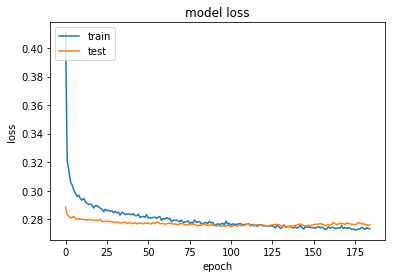

CONFUSION MATRIX:
y_pred:  [0 0 0 ... 0 0 0]
Y_true: [0 0 0 ... 1 0 0]


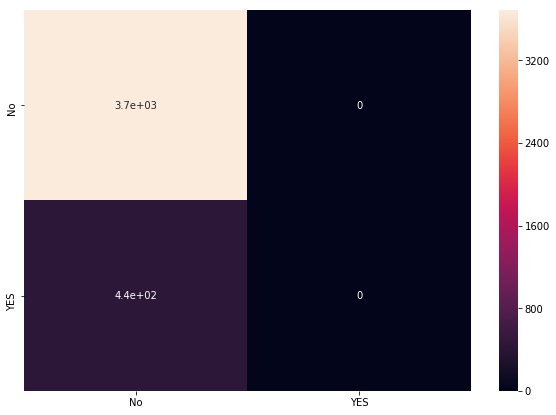

In [13]:
# Model experiment-2:
'''
* Enculde 'default' attribute
* Try Different metrics such as AUC, precision, recall, F1_score
* Use class_weights to counter for class imbalancing 

'''
# Convert data into numpy 'input and labels array'
input_data2=[i[:4]+i[5:10]+i[11:-1] for i in df.values.tolist()] #Exclude 'duration' attribute
labels2=[int(i[-1]) for i in df.values.tolist()]
input_data2[0]

from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',np.unique(labels2),labels2)
class_weights

def recall(y_true, y_pred):
    """Recall metric.

    Only computes a batch-wise average of recall.

    Computes the recall, a metric for multi-label classification of
    how many relevant items are selected.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision(y_true, y_pred):
    """Precision metric.

    Only computes a batch-wise average of precision.

    Computes the precision, a metric for multi-label classification of
    how many selected items are relevant.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision
    
def f1(y_true, y_pred):
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))



import tensorflow as tf
def auc(y_true, y_pred):
    auc = tf.metrics.auc(y_true, y_pred)[1]
    K.get_session().run(tf.local_variables_initializer())
    return auc

def response_predictor_model2(input_data, output_data):

    train_in, train_out, dev_in, dev_out, test_in, test_out = test_train_dev_split(
        input_data, output_data)

    #https://arxiv.org/pdf/1509.05371v2.pdf
    
    print(np.array(train_in).shape)
    
    model=Sequential()
    model.add(Dense(64,activation='relu',input_shape=(18,)))
    model.add(Dropout(0.4))
    '''model.add(Dense(200,activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.4))
    '''
    model.add(Dense(32,activation='relu'))
    model.add(Dropout(0.4))
    
    model.add(Dense(1,activation='sigmoid'))
    print(model.input_shape,model.output_shape)
    print(model.summary())

    '''
    model.compile(
        optimizer=adam(0.001),
        loss=[focal_loss(alpha=.25, gamma=2)],
        metrics=['accuracy'])
    
    '''
    model.compile(
        optimizer=adam(0.001),
        loss='binary_crossentropy',
        metrics=[recall])
    
    early = EarlyStopping(patience=50)
    
    check = ModelCheckpoint(
        'find_phone_model2_f1.h5',
        monitor='val_loss',
        verbose=1,
        save_best_only=True,
        save_weights_only=False,
        mode='auto',
        period=1)

    model_history=model.fit(
        train_in,
        train_out,
        batch_size=256,
        callbacks=[early, check],
        validation_data=(dev_in, dev_out),
        class_weight=class_weights,
        epochs=500)

    loss, acc = model.evaluate(test_in, test_out)
    print("Loss: {0}    Accuracy: {1}".format(loss, acc))
    
    plt.plot(model_history.history['loss'])
    plt.plot(model_history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
    print("CONFUSION MATRIX:")
    y_pred = model.predict(test_in)
    
    y_pred = np.argmax(y_pred, axis=1)
    print("y_pred: ",y_pred)
    #print(y_pred)
    #print(y_pred.shape)
    #print("Test_out:",test_out)
    y_true =test_out
    print("Y_true:",y_true)
    array = confusion_matrix(y_true, y_pred)
    #df_cm = pd.DataFrame(array)
    df_cm = pd.DataFrame(array, index = ['No','YES'],columns = ['No','YES'])
    plt.figure(figsize=(10, 7))
    sn.heatmap(df_cm, annot=True)
    
    return model
model=response_predictor_model2(input_data2,labels2)
# Random Basline model: 88.7% 

In [14]:
# SVM model 
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(input_data, labels, test_size=0.1,random_state=109)
# 70% training and 30% test
Counter(y_train)

from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(C=1,kernel='rbf',class_weight='balanced') # Rbf Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)



C:\Users\Ravi\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

![](https://cdn-images-1.medium.com/max/960/1*pOtBHai4jFd-ujaNXPilRg.png)


Accuracy: 0.8436513716921583
Precision: 0.3780160857908847
Recall: 0.6103896103896104
              precision    recall  f1-score   support

           0       0.95      0.87      0.91      3657
           1       0.38      0.61      0.47       462

   micro avg       0.84      0.84      0.84      4119
   macro avg       0.66      0.74      0.69      4119
weighted avg       0.88      0.84      0.86      4119



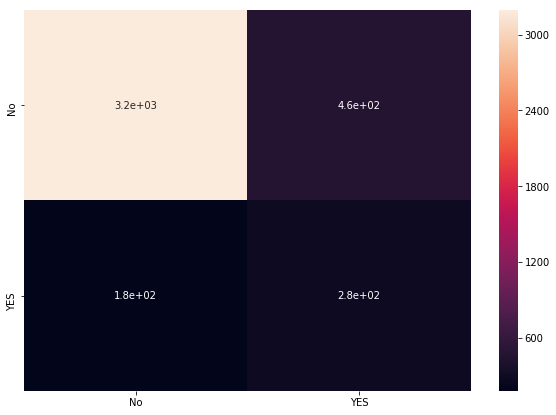

In [15]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)



from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


# Model Precision: what percentage of responses are classified correctly?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))


array = confusion_matrix(y_test, y_pred)
#df_cm = pd.DataFrame(array)
df_cm = pd.DataFrame(array, index = ['No','YES'],columns = ['No','YES'])
plt.figure(figsize=(10, 7))
sn.heatmap(df_cm, annot=True)
    

from sklearn import metrics

y_preds = clf.predict(X_test)

# --classification report --
print(metrics.classification_report(y_test, y_preds, labels=[0,1]))


# Save the SVM model
import pickle
pickle.dump(clf, open('svm_model_balanced', 'wb'))

In [ ]:
'''

We can predict a prospect beforehand and thus only call only those customers who are likely to opt for a term deposit, 
Thus saving the cost of calling customers which would not have opted for a term deposit. 

Thus as can be seen above, we a total of around 7400(Positives)=4600(False positives)+2800(True positives) 

In random calling:    we get a total of 4640(True positives) out of 41,188 calls
In Selective calling: we get a total of 2800(True Positive) out of 7400 calls 

Financial Benefit: 
Thus the model enables us to give 60.3% of the prospects in just ~17.9% cost and resources as compared to random calling.

'''